In [3]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import pandas as pd

# from orgs

In [4]:
paths = [
    'aclImdb_v1//test//neg',
    'aclImdb_v1//test//pos',
    'aclImdb_v1//train//neg',
    'aclImdb_v1//train//pos',
]

In [5]:
import os
import tqdm

In [6]:
o_samples = []

for path in paths:
    files = os.listdir(path)
    for file in tqdm.tqdm(files):
        with open(file=os.path.join(path, file), mode='r', encoding='utf-8') as f:
            text = f.read()
        label = int(file.split('.')[0].split('_')[1])
        o_samples.append([text, label-1])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [01:14<00:00, 168.86it/s]


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

Counter({0: 10122, 9: 9731, 7: 5859, 3: 5331, 2: 4961, 6: 4803, 8: 4607, 1: 4586})


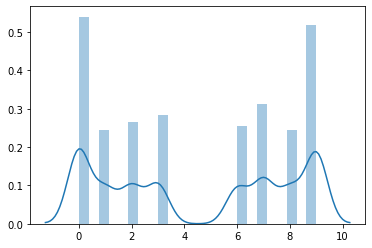

In [8]:
print(Counter([s[1] for s in o_samples]))
sns.distplot([s[1] for s in o_samples])
plt.show()

# Hedwig

In [9]:
import csv
import math

In [10]:
h_samples = []

for file in os.listdir('hedwig-data//datasets//IMDB'):
    with open(file=os.path.join('hedwig-data//datasets//IMDB', file), mode='r', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter="\t", quotechar=None)
        for line in tqdm.tqdm(reader):
            label = int(math.log10(int(line[0])))
            text  = line[1]
            h_samples.append([text, label])

13432it [00:00, 30442.38it/s]
13567it [00:00, 25913.71it/s]
108670it [00:03, 31866.77it/s]


Counter({2: 33848, 3: 23127, 0: 18665, 1: 17385, 4: 15200, 5: 9654, 6: 6255, 9: 4394, 7: 4144, 8: 2997})


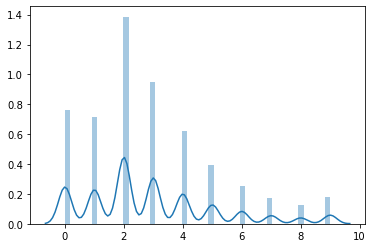

In [11]:
print(Counter([s[1] for s in h_samples]))
sns.distplot([s[1] for s in h_samples])
plt.show()

# Scrap

In [12]:
import json

with open(file='imdb.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)

In [13]:
s_samples = []
for film in data:
    for r, l in film['rated_reviews']:
        s_samples.append([r, l])

Counter({10: 7691, 9: 3494, 8: 2469, 1: 1006, 7: 892, 6: 528, 5: 414, 4: 338, 3: 331, 2: 315})


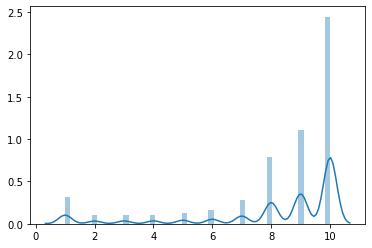

In [14]:
print(Counter([s[1] for s in s_samples]))
sns.distplot([s[1] for s in s_samples])
plt.show()

# Sum

Counter({2: 39124, 3: 28789, 0: 28787, 1: 22977, 9: 17619, 4: 15538, 6: 11586, 7: 10895, 8: 10073, 5: 10068, 10: 7691})


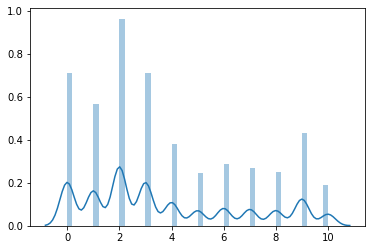

In [15]:
samples = o_samples + h_samples + s_samples
print(Counter([s[1] for s in samples]))
sns.distplot([s[1] for s in samples])
plt.show()

# Balancing & data save

In [16]:
import random

def make_csv(samples, file, balaning=True):
    df = pd.DataFrame(data={'text': [s[0] for s in samples], 'label': [s[1] for s in samples]})
    if balaning:
        ros = RandomOverSampler()
        texts, labels = ros.fit_resample(df[['text']], df.label)
        df = texts.copy()
        df['label'] = labels
    df.to_csv(file)
    print(df.shape)
    
random.shuffle(samples)

In [17]:
train_samples = samples[:int(0.8*len(samples))]
test_samples  = samples[int(0.8*len(samples)):]


    
make_csv(o_samples, "aclImdb.csv", balaning=False)
make_csv(h_samples, "hedwig.csv", balaning=False)
make_csv(s_samples, "scrapped.csv", balaning=False)

make_csv(train_samples, "train.csv", balaning=True)
make_csv(test_samples, "test.csv", balaning=True)
make_csv(samples, 'full.csv', balaning=False)

(50000, 2)
(135669, 2)
(17478, 2)
(344256, 2)
(86108, 2)
(203147, 2)
